<a href="https://colab.research.google.com/github/BHOOMIJ256/CyberSecurity_Web_Threat/blob/main/Cybersecurity_Web_Threat_Interactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement and Objectives**


With the rise of cyber threats, identifying suspicious web traffic in real time is critical for ensuring cybersecurity. Traditional rule-based detection methods struggle to detect zero-day attacks and unknown threats, as they rely on predefined signatures. This project aims to build an anomaly detection model using machine learning techniques to classify web interactions as normal or malicious, enabling early threat detection and proactive security measures

**Solution:** The above model leverages unsupervised learning methods like Isolation Forest, DBSCAN, and Autoencoders to detect anomalies in web traffic data. It works by:

1. Extracting network behavior patterns from key attributes like session duration, traffic rate, and response codes.
2. Identifying unusual interactions that significantly deviate from normal web activity.
3. Providing automated and real-time alerts on potential cyber threats, helping security teams take preventive action.  

By applying machine learning to web security, this project offers a scalable and efficient early warning system for detecting cyber anomalies before they escalate into major security incidents

# **Reading and Understanding the Dataset**

In [50]:
import pandas as pd

data = pd.read_csv("CloudWatch_Traffic_Web_Attack.csv")
data

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [51]:
#Start 10 values

data.head(10)

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
5,3906,3488,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
6,17748,29208,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
7,4767917,291520,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
8,10538,15514,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
9,9656,6380,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [52]:
#Last 10 values

data.tail(10)

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
272,28988,15340,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.213.7,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
273,30450,14276,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
274,3976,11178,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,94.188.248.74,IL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
275,3782,11038,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
276,40,264,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,192.241.205.18,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
281,9032,5862,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [53]:
#Data-information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [54]:
data.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types'],
      dtype='object')

In [55]:
#Column-wise number of unique values

data.nunique()

,0
bytes_in,260
bytes_out,239
creation_time,30
end_time,30
src_ip,28
src_ip_country_code,7
protocol,1
response.code,1
dst_port,1
dst_ip,1


In [56]:
data.count

<bound method DataFrame.count of      bytes_in  bytes_out         creation_time              end_time  \
0        5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1       30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2       28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3       30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4        6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
..        ...        ...                   ...                   ...   
277     41336      13180  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
278      3638       3190  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
279  25207794    1561220  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
280      5736      12114  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
281      9032       5862  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   

              src_ip src_ip_country_code protocol  response.code  dst_port  \
0     147.161.161.82                  AE    HTTPS            200       443   
1       165.225.33.6                  US    HTTPS            200       443   
2    165.225.212.255                  CA    HTTPS            200       443   
3     136.226.64.114                  US    HTTPS            200       443   
4     165.225.240.79                  NL    HTTPS            200       443   
..               ...                 ...      ...            ...       ...   
277   136.226.77.103                  CA    HTTPS            200       443   
278   165.225.26.101                  DE    HTTPS            200       443   
279    155.91.45.242                  US    HTTPS            200       443   
280    165.225.209.4                  CA    HTTPS            200       443   
281    147.161.131.1                  AT    HTTPS            200       443   

           dst_ip              rule_names  \
0    10.138.69.97  Suspicious Web Traffic   
1    10.138.69.97  Suspicious Web Traffic   
2    10.138.69.97  Suspicious Web Traffic   
3    10.138.69.97  Suspicious Web Traffic   
4    10.138.69.97  Suspicious Web Traffic   
..            ...                     ...   
277  10.138.69.97  Suspicious Web Traffic   
278  10.138.69.97  Suspicious Web Traffic   
279  10.138.69.97  Suspicious Web Traffic   
280  10.138.69.97  Suspicious Web Traffic   
281  10.138.69.97  Suspicious Web Traffic   

                         observation_name   source.meta     source.name  \
0    Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
1    Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
2    Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
3    Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
4    Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
..                                    ...           ...             ...   
277  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
278  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
279  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
280  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   
281  Adversary Infrastructure Interaction  AWS_VPC_Flow  prod_webserver   

                     time detection_types  
0    2024-04-25T23:00:00Z        waf_rule  
1    2024-04-25T23:00:00Z        waf_rule  
2    2024-04-25T23:00:00Z        waf_rule  
3    2024-04-25T23:00:00Z        waf_rule  
4    2024-04-25T23:00:00Z        waf_rule  
..                    ...             ...  
277  2024-04-26T09:50:00Z        waf_rule  
278  2024-04-26T09:50:00Z        waf_rule  
279  2024-04-26T09:50:00Z        waf_rule  
280  2024-04-26T09:50:00Z        waf_rule  
281  2024-04-26T09:50:00Z        waf_rule  

[282 rows x 16 columns]>

In [57]:
#Data Description

data.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


# **Data Preprocessing and Feature Engineering**

In [58]:
#Checking for Null Values

data.isnull()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
278,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
280,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
data.isnull().sum()

,0
bytes_in,0
bytes_out,0
creation_time,0
end_time,0
src_ip,0
src_ip_country_code,0
protocol,0
response.code,0
dst_port,0
dst_ip,0


In [60]:
#Checking for duplicated values

data.duplicated().sum()

0

In [61]:
#Conversion of variables to datetime

data['creation_time'] = pd.to_datetime(data['creation_time'])
data['end_time'] = pd.to_datetime(data['end_time'])
data['time'] = pd.to_datetime(data['time'])



In [62]:
#Session duration in seconds
data['duration'] = (data['end_time'] - data['creation_time']).dt.total_seconds()


In [63]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
categorical_cols = ['protocol', 'src_ip_country_code', 'rule_names', 'observation_name',
                    'source.meta', 'source.name', 'detection_types']
for col in categorical_cols:
    data[col] = data[col].astype(str)  # Ensure categorical data is string
    data[col] = LabelEncoder().fit_transform(data[col])

In [64]:
data['bytes_total'] = data['bytes_in'] + data['bytes_out']

In [65]:
data.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types', 'duration', 'bytes_total'],
      dtype='object')

In [66]:
data

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,duration,bytes_total
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,0,0,200,443,10.138.69.97,0,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,18592
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,6,0,200,443,10.138.69.97,0,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,49098
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,2,0,200,443,10.138.69.97,0,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,41974
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,6,0,200,443,10.138.69.97,0,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,44824
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,5,0,200,443,10.138.69.97,0,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,20418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,136.226.77.103,2,0,200,443,10.138.69.97,0,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,54516
278,3638,3190,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.26.101,3,0,200,443,10.138.69.97,0,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,6828
279,25207794,1561220,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,155.91.45.242,6,0,200,443,10.138.69.97,0,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,26769014
280,5736,12114,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.209.4,2,0,200,443,10.138.69.97,0,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,17850


In [67]:
# #standard scaling

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numerical_cols = ['bytes_in', 'bytes_out', 'bytes_total','duration']
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [68]:
# # Standardize numerical features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(data[numerical_cols])

# # Add scaled features back to the dataset for model training
# scaled_data = data.copy()
# scaled_data[numerical_cols] = scaled_features

# # Preview the processed data
# print(scaled_data.head())

# **Exploratory Data Analysis**

In [69]:
data.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types', 'duration', 'bytes_total'],
      dtype='object')

## **Univariate-Analysis**

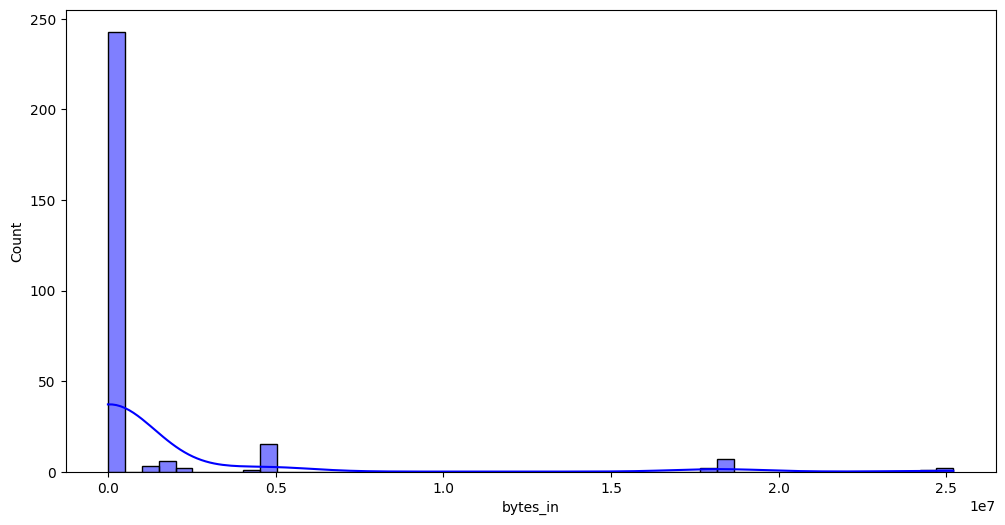

In [70]:
# Histogram for bytes_in attribute
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data['bytes_in'], bins=50, color='blue', kde=True,
label='Bytes In')

plt.show()

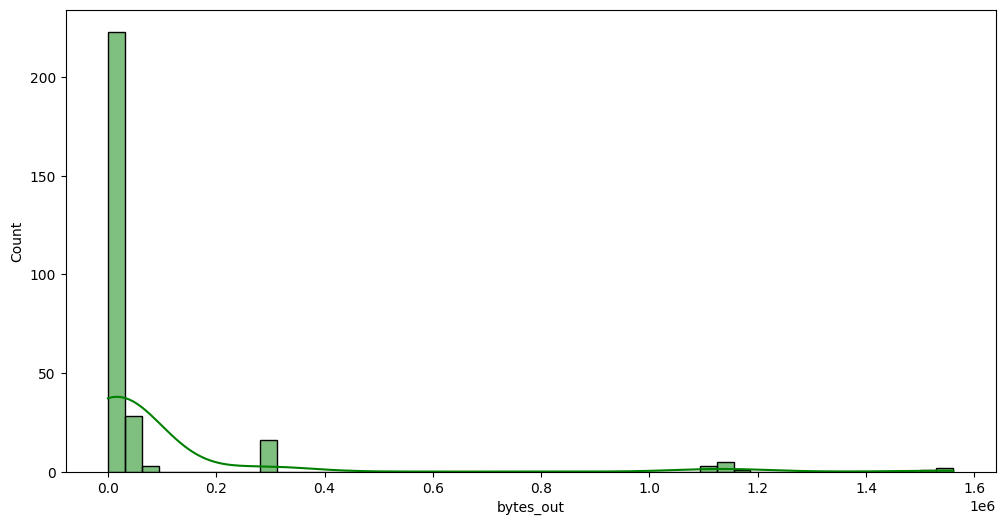

In [71]:
#Histogram for Bytes_out attribute

plt.figure(figsize=(12, 6))
sns.histplot(data['bytes_out'], bins=50, color='green', kde=True,
label='Bytes Out')

plt.show()



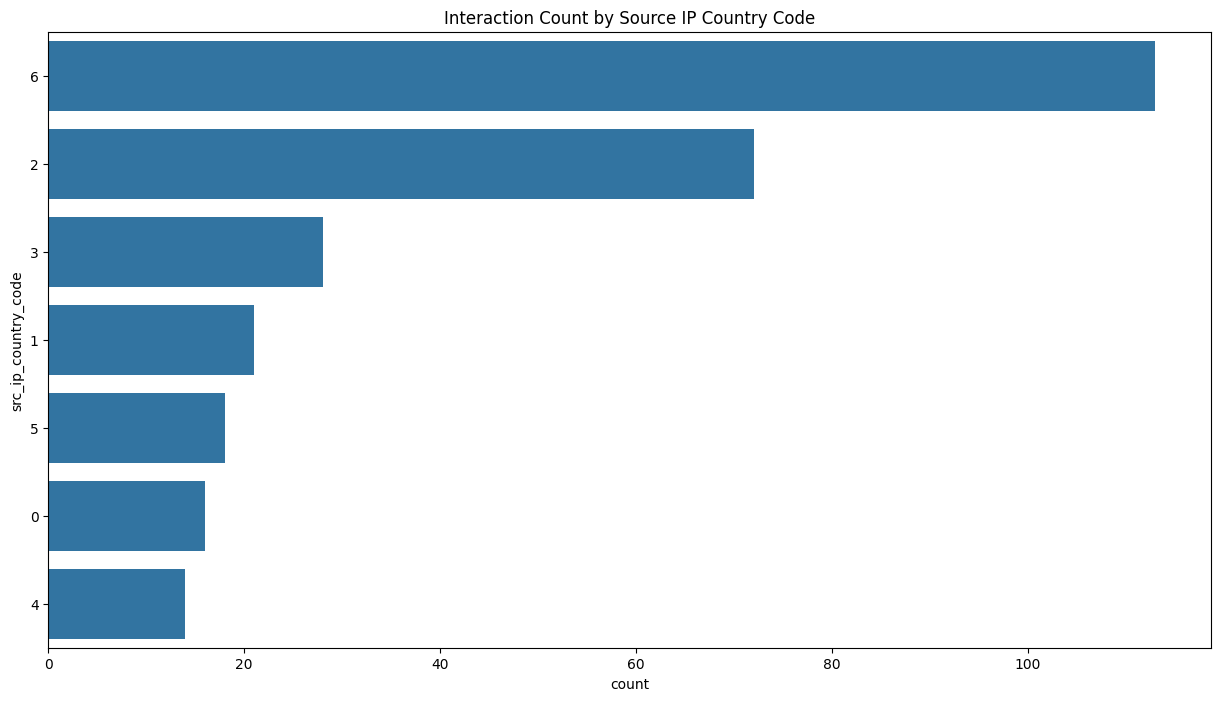

In [72]:
#Count-plot for source ip_country_code

plt.figure(figsize=(15, 8))
sns.countplot(y='src_ip_country_code', data=data,
order=data['src_ip_country_code'].value_counts().index)
plt.title('Interaction Count by Source IP Country Code')
plt.show()

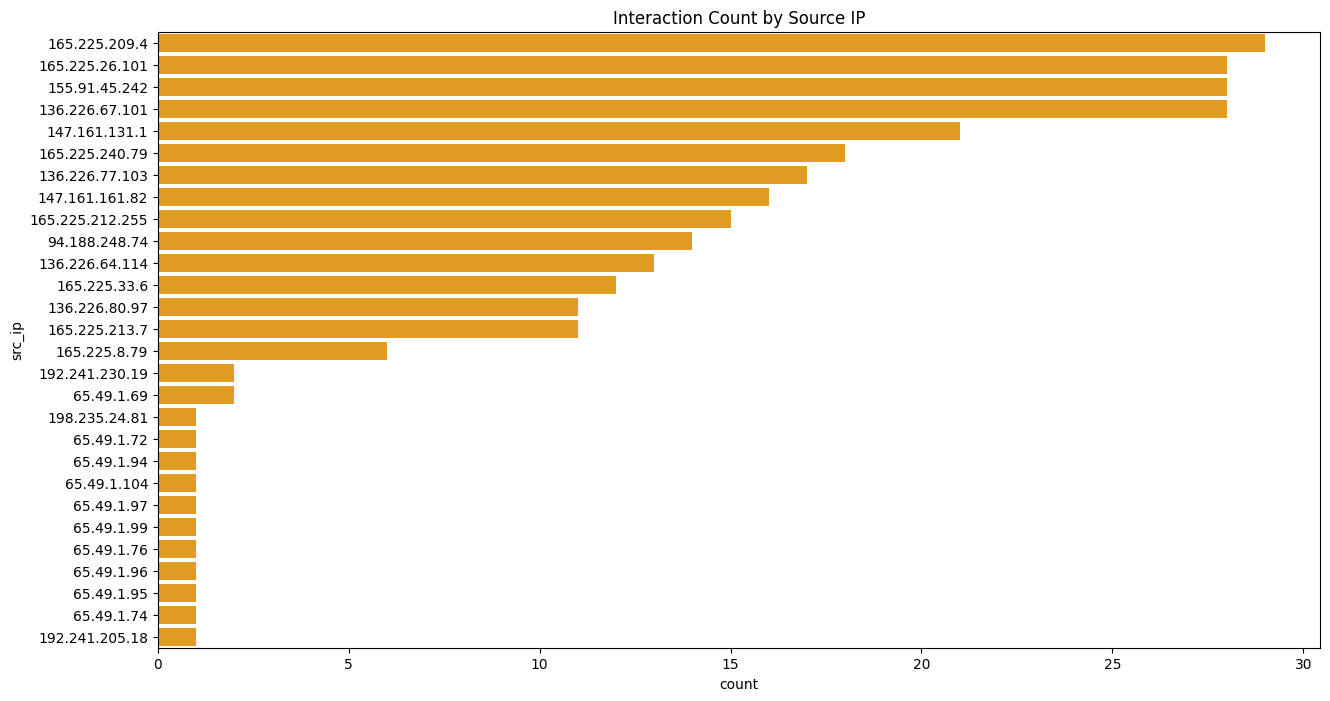

In [73]:
# Interaction count as per ip source code

data['src_ip'].nunique()
data['src_ip'].value_counts()

plt.figure(figsize=(15, 8))
sns.countplot(y='src_ip', data=data,
order=data['src_ip'].value_counts().index,color="orange")
plt.title('Interaction Count by Source IP')
plt.show()

In [74]:
#Identifying what unique values exists in protocal

data['protocol'].value_counts()

,count
protocol,
0,282


In [75]:
#unique count for response code
data['response.code'].value_counts()

,count
response.code,
200,282


In [76]:
#Count for Dst_port

data['dst_port'].value_counts()

,count
dst_port,
443,282


In [77]:
data['duration'].nunique()

data['duration'].value_counts()

,count
duration,
600.0,282


In [78]:
data['observation_name'].nunique()

data['observation_name'].value_counts()

,count
observation_name,
0,282


In [79]:
data['detection_types'].nunique()

data['detection_types'].value_counts()

,count
detection_types,
0,282


In [80]:
data['source.meta'].nunique()

data['detection_types'].value_counts()

,count
detection_types,
0,282


In [81]:
data['rule_names'].nunique()

data['rule_names'].value_counts()

,count
rule_names,
0,282


In [82]:
data['dst_ip'].nunique()

data['dst_ip'].value_counts()

,count
dst_ip,
10.138.69.97,282


In [83]:
data['source.name'].nunique()

data['source.name'].value_counts()

,count
source.name,
0,282


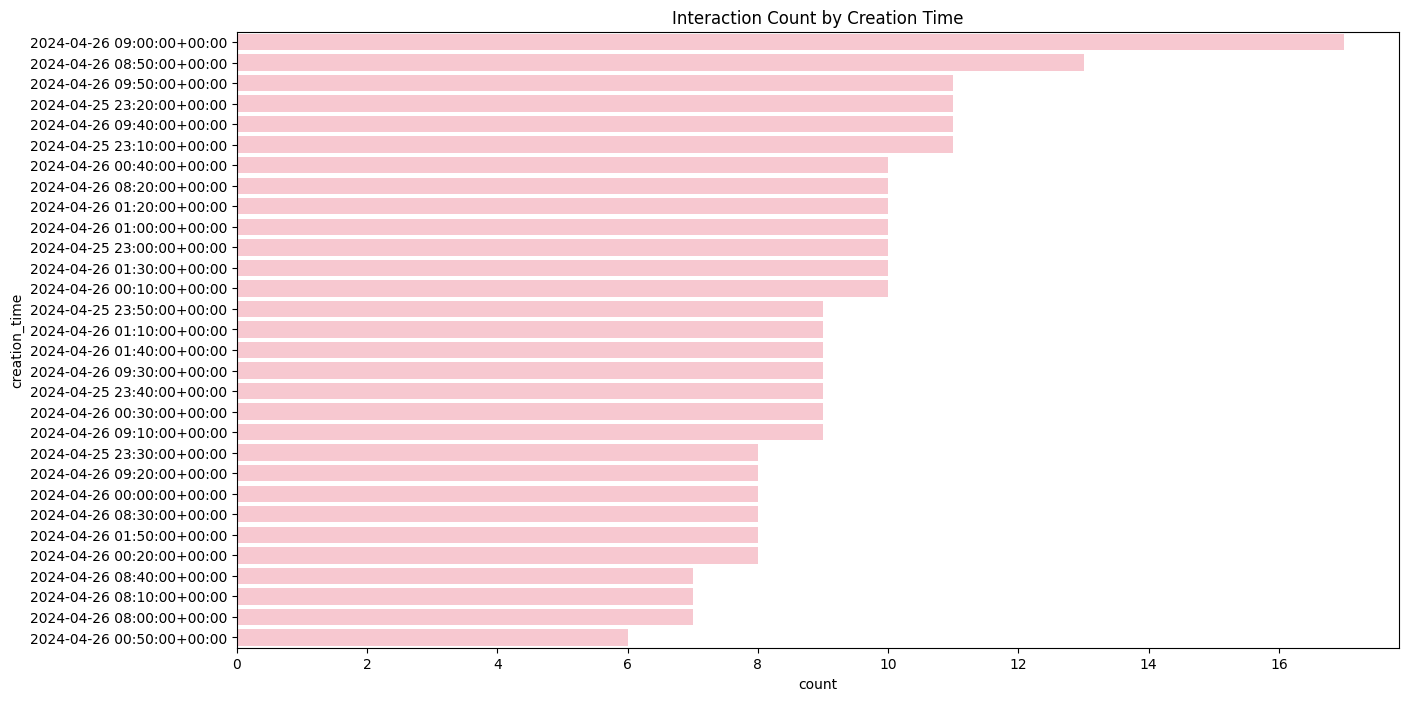

In [84]:
data['creation_time'].nunique()

plt.figure(figsize=(15, 8))
sns.countplot(y='creation_time', data=data,
order=data['creation_time'].value_counts().index,color="pink")
plt.title('Interaction Count by Creation Time')
plt.show()

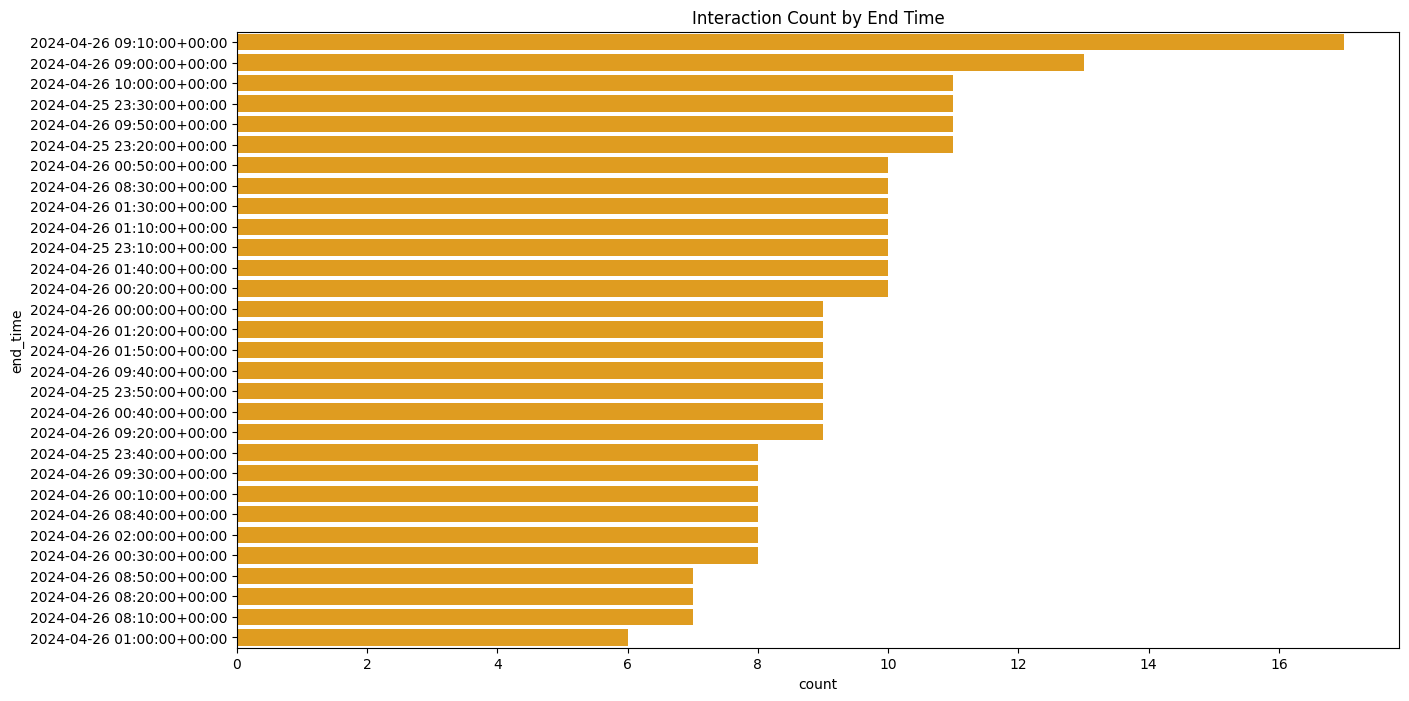

In [85]:
data['end_time'].nunique()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.countplot(y='end_time', data=data,
order=data['end_time'].value_counts().index,color="orange")
plt.title('Interaction Count by End Time')
plt.show()

## **Multivarite Correlation**

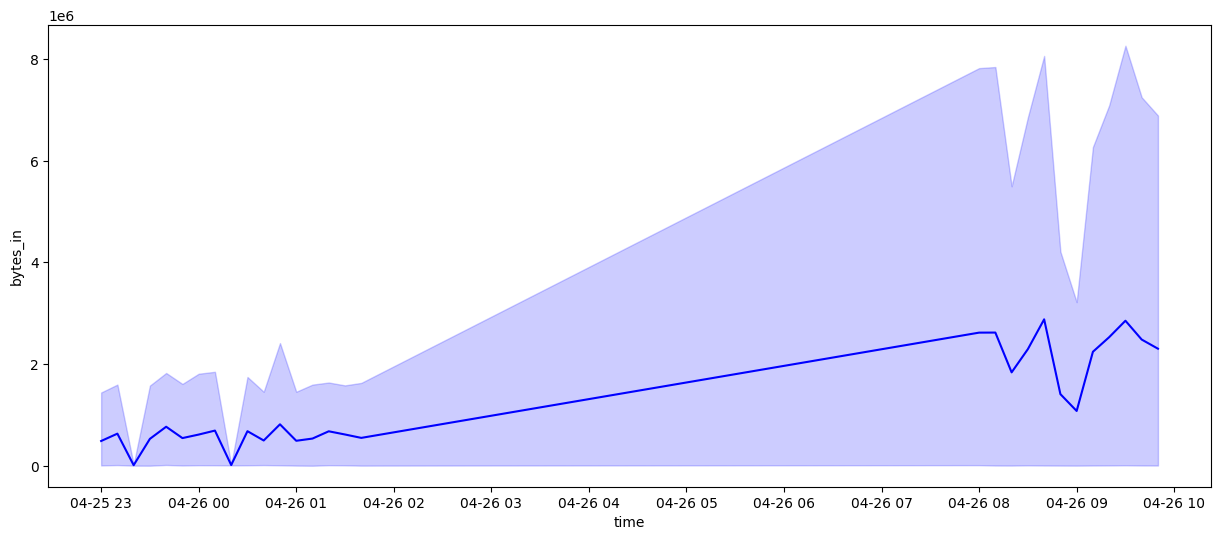

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
plt = plt.figure(figsize=(15,6))
sns.lineplot(x='time', y='bytes_in', data=data,color="blue")
plt.show()

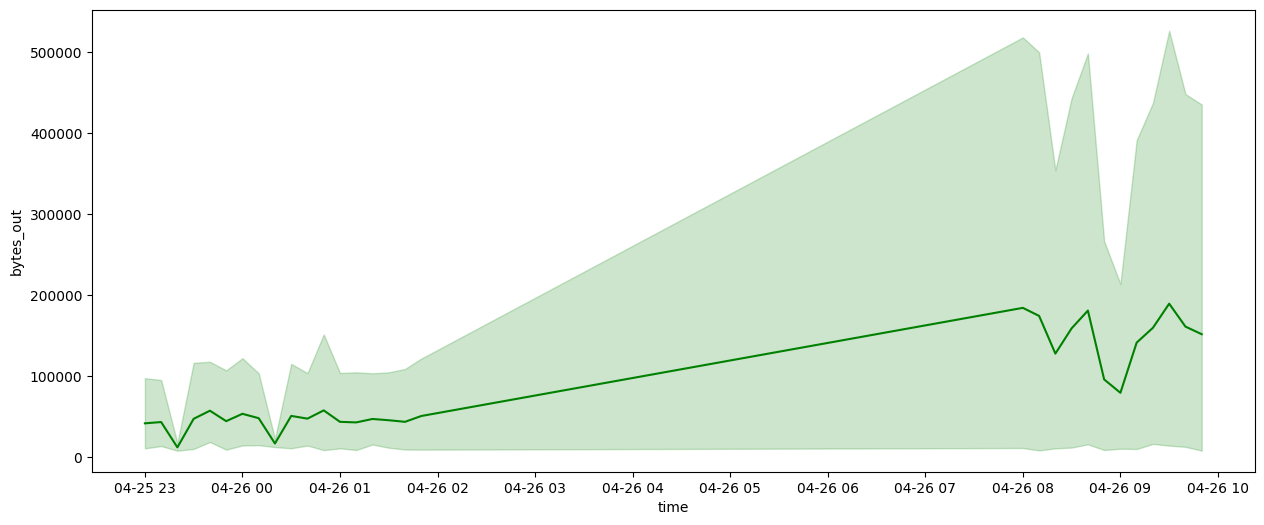

In [90]:
import matplotlib.pyplot as plt

plt = plt.figure(figsize=(15,6))
sns.lineplot(x='time', y='bytes_out', data=data,color="green")
plt.show()


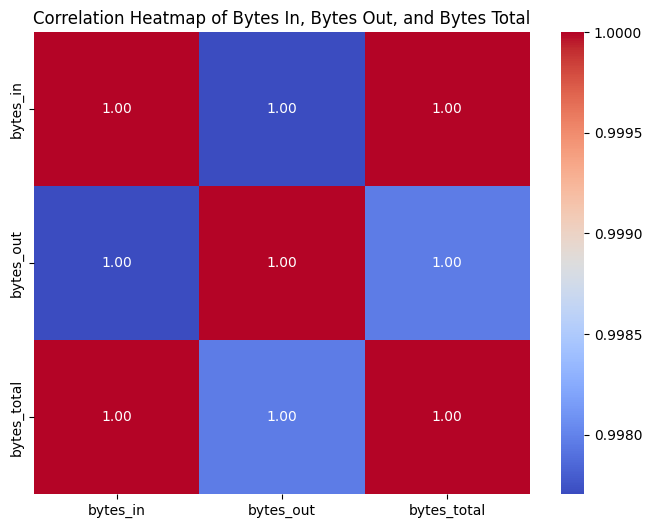

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
correlation_matrix = data[['bytes_in', 'bytes_out', 'bytes_total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Bytes In, Bytes Out, and Bytes Total')
plt.show()


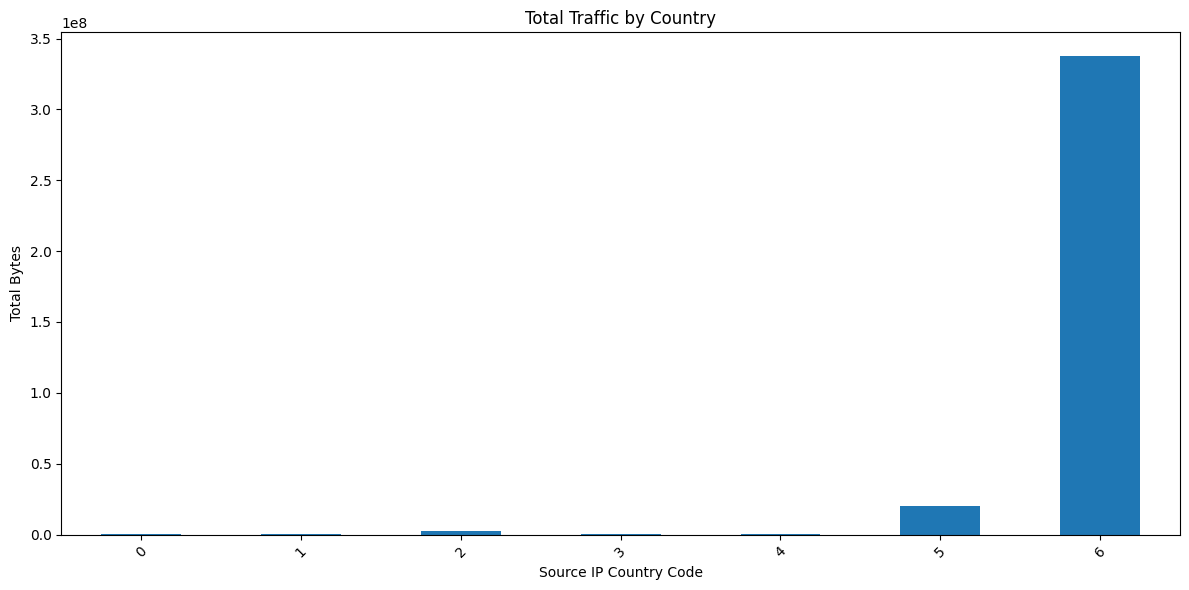

In [93]:

# Group by src_ip_country_code and sum bytes_total
country_traffic = data.groupby('src_ip_country_code')['bytes_total'].sum()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_traffic.plot(kind='bar')
plt.xlabel('Source IP Country Code')
plt.ylabel('Total Bytes')
plt.title('Total Traffic by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Model Selection and Training**

**Choosing the Right Model for Anomaly Detection
For this dataset, we explored multiple anomaly detection techniques:**

**Why Multiple Models?**

Each model has different strengths and weaknesses:

* Isolation Forest is fast and interpretable.
* DBSCAN works well when data has a clear cluster structure.
* Autoencoders are powerful for non-linear and high-dimensional data.

**By using all three, we compare their effectiveness in detecting anomalies and choose the best one based on real-world performance.**

## **Isolation Forest Model**

* Works by randomly selecting features and splitting data to isolate anomalies.
* Effective for high-dimensional data and does not assume any specific data distribution.
* Suitable for real-time threat detection.

In [94]:
#importing all necessary libraries


from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [95]:
# Selecting only the relevant features
features = ['bytes_in', 'bytes_out', 'src_ip_country_code', 'protocol', 'response.code', 'dst_port']
X = data[features]

In [96]:
#Standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
iso_forest = IsolationForest( contamination=0.1, random_state=42)
data['anomaly'] = iso_forest.fit_predict(X_scaled)

In [127]:
# Filter anomalies
anomalies = data[data['anomaly'] == -1]
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
     bytes_in  bytes_out             creation_time                  end_time  \
15    1968903      38773 2024-04-25 23:10:00+00:00 2024-04-25 23:20:00+00:00   
36    4190330     283456 2024-04-25 23:30:00+00:00 2024-04-25 23:40:00+00:00   
43    2015975      79990 2024-04-25 23:40:00+00:00 2024-04-25 23:50:00+00:00   
47    4758826     289956 2024-04-25 23:40:00+00:00 2024-04-25 23:50:00+00:00   
87    1215594      64362 2024-04-26 00:30:00+00:00 2024-04-26 00:40:00+00:00   
116   4827283     306181 2024-04-26 01:00:00+00:00 2024-04-26 01:10:00+00:00   
132   1889834      34306 2024-04-26 01:20:00+00:00 2024-04-26 01:30:00+00:00   
142   1253276      46666 2024-04-26 01:30:00+00:00 2024-04-26 01:40:00+00:00   
146   4808787     301495 2024-04-26 01:30:00+00:00 2024-04-26 01:40:00+00:00   
153   4869181     301752 2024-04-26 01:40:00+00:00 2024-04-26 01:50:00+00:00   
161   4755578     292284 2024-04-26 01:50:00+00:00 2024-04-26 02:00:00+00:00   
169  18201558    117

In [128]:
# Count anomalies (-1) and normal points (1)
anomaly_counts = data['anomaly'].value_counts()
print(anomaly_counts)

# Percentage of anomalies
anomaly_percentage = (anomaly_counts[-1] / len(data)) * 100
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")


anomaly
 1    254
-1     28
Name: count, dtype: int64
Percentage of anomalies: 9.93%


### **Hyperparameter Tuning**

We will use the Grid Search Strategy , to do hyperparameter tuning for the above model.

**Grid Search**


*   Defining a range of values for each hyperparameter.
*   Train multiple models with different combinations.
*Pick the best-performing model based on precision-recall scores.






In [100]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Define hyperparameter values
n_estimators = [50, 75, 100]
max_samples = [128, 200, 256]
contamination = [0.05, 0.07, 0.1]

best_model = None
best_score = float('-inf')

for n in n_estimators:
    for ms in max_samples:
        for c in contamination:
            model = IsolationForest(n_estimators=n, max_samples=ms, contamination=c, random_state=42)
            model.fit(X_scaled)
            preds = model.predict(X_scaled)


            preds = [1 if p == -1 else 0 for p in preds]

            # Calculate anomaly ratio
            anomaly_ratio = sum(preds) / len(preds)

            # Choose model where detected anomalies are close to expected (5-10%)
            if 0.05 <= anomaly_ratio <= 0.1:
                best_model = model
                best_score = anomaly_ratio

print(f"Best Model: {best_model}, Anomaly Ratio: {best_score}")


Best Model: IsolationForest(contamination=0.1, max_samples=256, random_state=42), Anomaly Ratio: 0.09929078014184398


**Interpretation from above hyperparamter tuning.**

* Since our above dataset contains only 282 values, keeping n_estimators low (50-100) ensures that more trees might not cause overfitting.
* Using a 50%-90% of max_samples (128-256), ensures better model generalization.
* Starting with contamination ~5-10% , avoids over-flagging of anomalies.
* Since the dataset is small it is better to perform manual iteration, as small datasets can't afford extensive hyperparamter search.
* If too many or too few anomalies are flagged, adjust contamination.



In [130]:
model = IsolationForest(contamination=0.1, max_samples=256, random_state=42)
model.fit(X_scaled)

IsolationForest(contamination=0.1, max_samples=256, random_state=42)

In [131]:
predictions = model.predict(X_scaled )

In [132]:
data['anomaly'] = predictions

In [133]:
# Filter anomalies
anomalies = data[data['anomaly'] == -1]
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
     bytes_in  bytes_out             creation_time                  end_time  \
15    1968903      38773 2024-04-25 23:10:00+00:00 2024-04-25 23:20:00+00:00   
36    4190330     283456 2024-04-25 23:30:00+00:00 2024-04-25 23:40:00+00:00   
43    2015975      79990 2024-04-25 23:40:00+00:00 2024-04-25 23:50:00+00:00   
47    4758826     289956 2024-04-25 23:40:00+00:00 2024-04-25 23:50:00+00:00   
87    1215594      64362 2024-04-26 00:30:00+00:00 2024-04-26 00:40:00+00:00   
116   4827283     306181 2024-04-26 01:00:00+00:00 2024-04-26 01:10:00+00:00   
132   1889834      34306 2024-04-26 01:20:00+00:00 2024-04-26 01:30:00+00:00   
142   1253276      46666 2024-04-26 01:30:00+00:00 2024-04-26 01:40:00+00:00   
146   4808787     301495 2024-04-26 01:30:00+00:00 2024-04-26 01:40:00+00:00   
153   4869181     301752 2024-04-26 01:40:00+00:00 2024-04-26 01:50:00+00:00   
161   4755578     292284 2024-04-26 01:50:00+00:00 2024-04-26 02:00:00+00:00   
169  18201558    117

In [135]:
#Count anomalies (-1) and normal points (1)
anomaly_counts = data['anomaly'].value_counts()
print(anomaly_counts)

# Percentage of anomalies
anomaly_percentage = (anomaly_counts[-1] / len(data)) * 100
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

anomaly
 1    254
-1     28
Name: count, dtype: int64
Percentage of anomalies: 9.93%


### **Model Evaluation and Interpretation**

Since Isolation Forest is an unsupervised anomaly detection model, evaluating it is different from traditional supervised learning models. Below are the key ways through which we evaluate and interpret the results:

**Isolation Forest:**

1. Outlier Ratio

2. Visualize decision function

3. Compare detected anomalies with domain knowledge






In [106]:


anomaly_ratio = sum(data['anomaly'] == -1) / len(data)
print(f"Anomaly Detection Rate: {anomaly_ratio * 100:.2f}%")


Anomaly Detection Rate: 9.93%


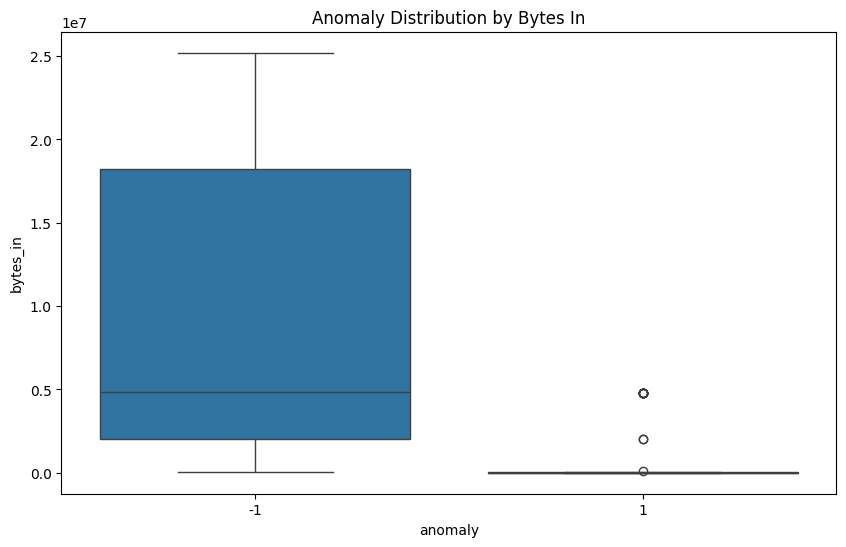

In [107]:
#Anomaly distribution with respect to bytes in
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x=data['anomaly'], y= data['bytes_in'])
plt.title("Anomaly Distribution by Bytes In")
plt.show()


**Box-Plot:**

* If anomalies show significantly higher/lower values for bytes_in, it suggests traffic-based anomalies.

* Helps in deciding feature scaling and transformation.

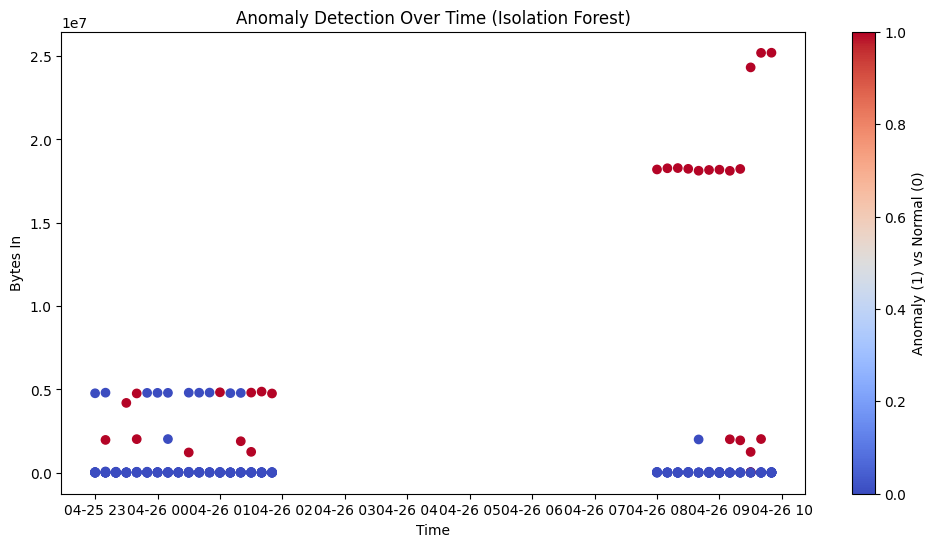

In [108]:
#Cluster Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Convert anomaly labels
data['anomaly_binary'] = data['anomaly'].apply(lambda x: 1 if x == -1 else 0)

#Scatter Plot: Anomalies Over Time
plt.figure(figsize=(12,6))
plt.scatter(data['creation_time'], data['bytes_in'], c=data['anomaly_binary'], cmap='coolwarm')
plt.xlabel("Time")
plt.ylabel("Bytes In")
plt.title("Anomaly Detection Over Time (Isolation Forest)")
plt.colorbar(label="Anomaly (1) vs Normal (0)")
plt.show()



**Scatter-Plot:**

* If anomalies cluster at specific times, it may indicate attack bursts.

* If anomalies would have been random , feature engineering would be needed.


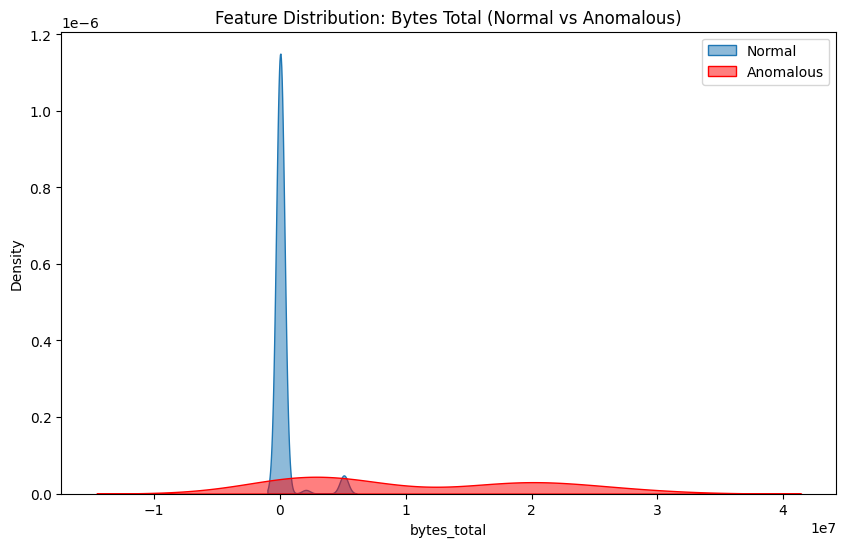

In [109]:
#KDE Plot: Feature Distribution for Normal vs Anomalous Data
plt.figure(figsize=(10,6))
sns.kdeplot(data[data['anomaly_binary'] == 0]['bytes_total'], label="Normal", fill=True, alpha=0.5)
sns.kdeplot(data[data['anomaly_binary'] == 1]['bytes_total'], label="Anomalous", fill=True, alpha=0.5, color='red')
plt.legend()
plt.title("Feature Distribution: Bytes Total (Normal vs Anomalous)")
plt.show()

**Feature-Distribution Plot:**

1. Since anomalies have a clear seperation from normal data , the model is performing well.

2. If both overlap, adjusting contamination or selecting better features would be the solution.

## **DBSCAN (Density Based Spatial Clustering of Applications with Noise)**


* Identifies dense clusters and classifies outliers as anomalies.
* Works well when anomalies exist as isolated points in sparse regions.
* Ideal for datasets where normal interactions form natural clusters.

In [110]:
data

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,duration,bytes_total,anomaly,anomaly_binary
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,0,0,200,443,10.138.69.97,0,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,18592,1,0
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,6,0,200,443,10.138.69.97,0,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,49098,1,0
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,2,0,200,443,10.138.69.97,0,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,41974,1,0
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,6,0,200,443,10.138.69.97,0,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,44824,1,0
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,5,0,200,443,10.138.69.97,0,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,20418,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,136.226.77.103,2,0,200,443,10.138.69.97,0,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,54516,1,0
278,3638,3190,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.26.101,3,0,200,443,10.138.69.97,0,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,6828,1,0
279,25207794,1561220,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,155.91.45.242,6,0,200,443,10.138.69.97,0,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,26769014,-1,1
280,5736,12114,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.209.4,2,0,200,443,10.138.69.97,0,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,17850,1,0


In [111]:
#DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
data['anomaly_dbscan'] = dbscan.fit_predict(X_scaled)



In [112]:
anomalies_dbscan = data[data['anomaly_dbscan'] == -1]
print(f"Total Detected Anomalies (DBSCAN): {len(anomalies_dbscan)}")

print("\n")
print("Detected Anomalies (DBSCAN):")
print(anomalies_dbscan)


Total Detected Anomalies (DBSCAN): 3


Detected Anomalies (DBSCAN):
     bytes_in  bytes_out             creation_time                  end_time  \
257  24326941    1529035 2024-04-26 09:30:00+00:00 2024-04-26 09:40:00+00:00   
267  25199191    1557598 2024-04-26 09:40:00+00:00 2024-04-26 09:50:00+00:00   
279  25207794    1561220 2024-04-26 09:50:00+00:00 2024-04-26 10:00:00+00:00   

            src_ip  src_ip_country_code  protocol  response.code  dst_port  \
257  155.91.45.242                    6         0            200       443   
267  155.91.45.242                    6         0            200       443   
279  155.91.45.242                    6         0            200       443   

           dst_ip  ...  observation_name  source.meta  source.name  \
257  10.138.69.97  ...                 0            0            0   
267  10.138.69.97  ...                 0            0            0   
279  10.138.69.97  ...                 0            0            0   

                 

###**Hyperparameter-Tuning**

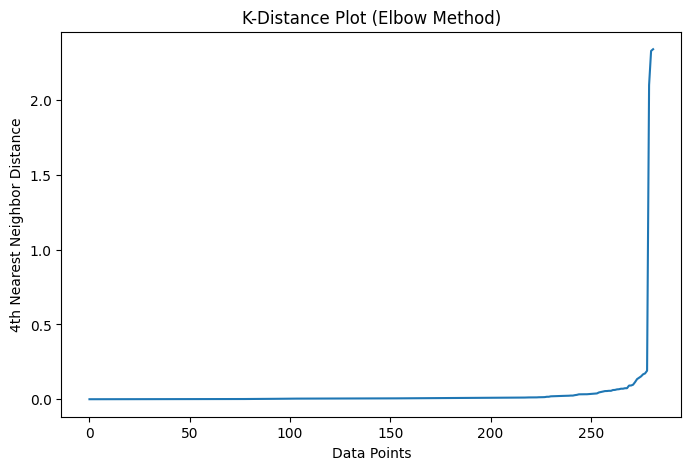

In [113]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Fit nearest neighbors model
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort the distances for visualization
sorted_distances = np.sort(distances[:, 4])  # 4th neighbor distance
plt.figure(figsize=(8,5))
plt.plot(sorted_distances)
plt.xlabel("Data Points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Plot (Elbow Method)")
plt.show()


In [114]:
import numpy as np
min_samples = int(np.log(len(X_scaled)))
print("Optimal min_samples:", min_samples)


Optimal min_samples: 5


In [115]:
#Running the DBSCAN with Tuned Parameters

from sklearn.cluster import DBSCAN

optimal_eps = 1.5  # Set based on K-distance plot
optimal_min_samples = int(np.log(len(X_scaled)))

dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
data['anomaly_dbscan'] = dbscan.fit_predict(X_scaled)

# Count detected anomalies (-1 indicates anomalies)
print("Total Anomalies Detected by DBSCAN:", (data['anomaly_dbscan'] == -1).sum())


Total Anomalies Detected by DBSCAN: 3


### **Model Evaluation and Interpretation**

Unlike supervised learning models, DBSCAN (Density-Based Spatial Clustering of Applications with Noise) doesn’t have traditional accuracy metrics (like precision, recall, or F1-score) since it is an unsupervised algorithm. Instead, we evaluate it using clustering validation techniques and anomaly detection insights.

**DBSCAN:**

1. Number of noise points
2. Cluster separation visualization
3. Silhouette Score

In [116]:
#Anomaly Detection Rate

anomaly_count = (data['anomaly_dbscan'] == -1).sum()
total_points = len(data)
anomaly_percentage = (anomaly_count / total_points) * 100

print(f"Total Anomalies Detected by DBSCAN: {anomaly_count} ({anomaly_percentage:.2f}% of data)")


Total Anomalies Detected by DBSCAN: 3 (1.06% of data)


In [117]:
#Cluster Analysis

import numpy as np
unique_clusters, counts = np.unique(data['anomaly_dbscan'], return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} data points")


Cluster -1: 3 data points
Cluster 0: 270 data points
Cluster 1: 9 data points


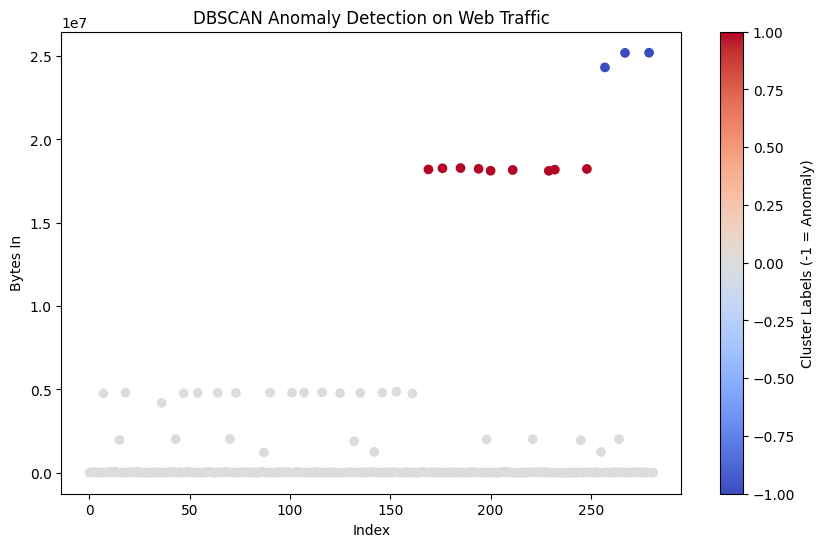

In [118]:
#Visualizing the clusters

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(data.index, data['bytes_in'], c=data['anomaly_dbscan'], cmap='coolwarm', marker='o')
plt.xlabel("Index")
plt.ylabel("Bytes In")
plt.title("DBSCAN Anomaly Detection on Web Traffic")
plt.colorbar(label="Cluster Labels (-1 = Anomaly)")
plt.show()


**Anomalies (-1) are far from dense clusters.**

In [119]:
#Silhouette Score for Cluster Quality

from sklearn.metrics import silhouette_score

# DBSCAN marks anomalies as -1; we exclude them from silhouette score calculation
valid_points = data[data['anomaly_dbscan'] != -1]
silhouette_avg = silhouette_score(X_scaled[valid_points.index], valid_points['anomaly_dbscan'])

print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.8062


**The Silhouette indicates that the clustering is well.**

## **Autoencoders (Neural Network-Based Anomaly Detection)**

* Learns to reconstruct normal data patterns using an encoder-decoder structure.
* Anomalies have higher reconstruction errors because they differ from normal data.
* Suitable for complex patterns that traditional models may fail to detect.

In [120]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd



In [121]:
input_dim = X_scaled.shape[1]
autoencoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

In [122]:
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=8, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4725 - val_loss: 1.0386
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4489 - val_loss: 0.8704
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4208 - val_loss: 0.6911
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1756 - val_loss: 0.4766
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1130 - val_loss: 0.2237
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0536 - val_loss: 0.0943
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0222 - val_loss: 0.0485
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_loss: 0.0292
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - val_loss: 0.0147
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0098
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0066
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - val_l

In [123]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,484 (5.80 KB)

 Trainable params: 494 (1.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 990 (3.87 KB)

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,...,observation_name,source.meta,source.name,time,detection_types,duration,bytes_total,anomaly,anomaly_binary,anomaly_dbscan
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,0,0,200,443,10.138.69.97,...,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,18592,1,0,0
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,6,0,200,443,10.138.69.97,...,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,49098,1,0,0
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,2,0,200,443,10.138.69.97,...,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,41974,1,0,0
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,6,0,200,443,10.138.69.97,...,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,44824,1,0,0
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,5,0,200,443,10.138.69.97,...,0,0,0,2024-04-25 23:00:00+00:00,0,600.0,20418,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,136.226.77.103,2,0,200,443,10.138.69.97,...,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,54516,1,0,0
278,3638,3190,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.26.101,3,0,200,443,10.138.69.97,...,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,6828,1,0,0
279,25207794,1561220,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,155.91.45.242,6,0,200,443,10.138.69.97,...,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,26769014,-1,1,-1
280,5736,12114,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.209.4,2,0,200,443,10.138.69.97,...,0,0,0,2024-04-26 09:50:00+00:00,0,600.0,17850,1,0,0


### **Hyperparameter-Tuning**

In [138]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [139]:
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(hp.Int('units', min_value=8, max_value=64, step=8), activation='relu'),
        layers.Dense(hp.Int('bottleneck', min_value=4, max_value=16, step=4), activation='relu'),
        layers.Dense(input_dim, activation='linear')
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])), loss='mse')
    return model

tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=10, executions_per_trial=1)
tuner.search(X_scaled, X_scaled, epochs=50, validation_split=0.1, batch_size=8)


Trial 10 Complete [00h 00m 15s]
val_loss: 0.001447357703000307

Best val_loss So Far: 0.0010611596517264843
Total elapsed time: 00h 02m 45s


### **Model Evaluation and Interpretation**

Autoencoders are evaluated based on how well they reconstruct normal data and differentiate anomalies. Since they are unsupervised, common metrics like accuracy and F1-score are not directly applicable unless labeled data is available. Below are key evaluation methods.

**Autoencoder:**

1. Reconstruction error distribution
2. AUC-ROC for anomaly thresholding

In [140]:

reconstructed_data = autoencoder.predict(X_scaled)

# Calculate the reconstruction error (MSE)
reconstruction_error = np.mean(np.power(X_scaled - reconstructed_data, 2), axis=1)

# Set a threshold for anomaly detection (you may need to adjust this)
threshold = np.percentile(reconstruction_error, 95)  # Example: 95th percentile

# Identify anomalies based on the threshold
data['anomaly_autoencoder'] = np.where(reconstruction_error > threshold, 1, 0)

# Calculate the loss and accuracy
loss = autoencoder.evaluate(X_scaled, X_scaled, verbose=0)
accuracy = np.mean(data['anomaly_autoencoder'] == data['anomaly_binary']) # Assuming 'anomaly_binary' from IsolationForest is the ground truth

print(f"Autoencoder Loss: {loss}")
print(f"Autoencoder Accuracy: {accuracy}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Autoencoder Loss: 0.0004559435183182359
Autoencoder Accuracy: 0.9184397163120568


In [141]:
from sklearn.metrics import roc_auc_score

auc_autoencoder = roc_auc_score(data['anomaly_autoencoder'], reconstruction_error)
print(f"AUC-ROC (Autoencoder): {auc_autoencoder:.4f}")

AUC-ROC (Autoencoder): 1.0000


In [142]:
# Separate normal and anomalous data
normal_data = data[data['anomaly'] == 1]
anomalous_data = data[data['anomaly'] == -1]

print("Normal Data Statistics:\n", normal_data[['bytes_in', 'bytes_out']].describe())
print("\nAnomalous Data Statistics:\n", anomalous_data[['bytes_in', 'bytes_out']].describe())



Normal Data Statistics:
            bytes_in      bytes_out
count  2.540000e+02     254.000000
mean   2.199110e+05   26262.704724
std    9.443972e+05   54859.112785
min    4.000000e+01      44.000000
25%    5.143500e+03   10681.750000
50%    1.006500e+04   13279.000000
75%    2.853600e+04   22081.500000
max    4.809606e+06  294875.000000

Anomalous Data Statistics:
            bytes_in     bytes_out
count  2.800000e+01  2.800000e+01
mean   1.008467e+07  6.133422e+05
std    8.940215e+06  5.711570e+05
min    2.806200e+04  3.430600e+04
25%    1.997648e+06  6.325300e+04
50%    4.818035e+06  3.016235e+05
75%    1.820915e+07  1.134892e+06
max    2.520779e+07  1.561220e+06


In [143]:
thresh = np.percentile(reconstruction_error, 95)  # 95% of normal points are below this
data['anomaly_autoencoder'] = (reconstruction_error > thresh).astype(int)
print(thresh)

0.001956208911396435


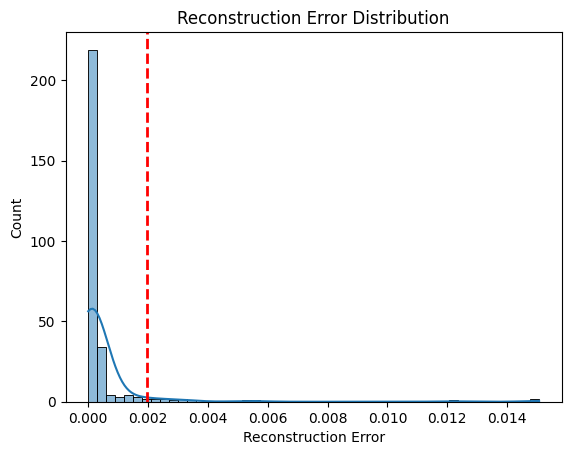

In [144]:
import seaborn as sns

sns.histplot(reconstruction_error, bins=50, kde=True)
plt.axvline(thresh, color='red', linestyle='dashed', linewidth=2)  # Threshold line
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.title("Reconstruction Error Distribution")
plt.show()


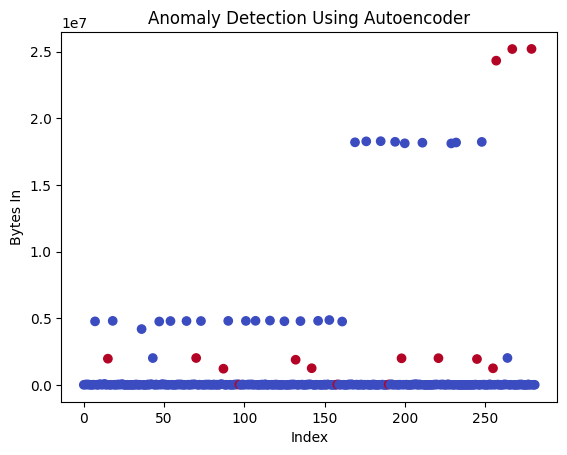

In [145]:
#visualizing the clusters

plt.scatter(data.index, data['bytes_in'], c=data['anomaly_autoencoder'], cmap='coolwarm', marker='o')
plt.xlabel("Index")
plt.ylabel("Bytes In")
plt.title("Anomaly Detection Using Autoencoder")
plt.show()


# **Final Interpretation**